In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:

coordinates = zip(lats,lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


608

In [6]:
import requests
requests.__version__

'2.25.1'

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key



In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"


In [10]:
# Make a 'Get' request for the city weather. (sample for wrong code)
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
# Create an endpoint URL for a city. (this is to compare with the Jason format below)
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"base":"stations","main":{"temp":36.68,"feels_like":34.07,"temp_min":33.64,"temp_max":37.51,"pressure":1011,"humidity":48},"visibility":10000,"wind":{"speed":3.44,"deg":220},"clouds":{"all":90},"dt":1638137099,"sys":{"type":1,"id":3486,"country":"US","sunrise":1638100259,"sunset":1638134042},"timezone":-18000,"id":4930956,"name":"Boston","cod":200}'

In [12]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 36.68,
  'feels_like': 34.07,
  'temp_min': 33.64,
  'temp_max': 37.51,
  'pressure': 1011,
  'humidity': 48},
 'visibility': 10000,
 'wind': {'speed': 3.44, 'deg': 220},
 'clouds': {'all': 90},
 'dt': 1638137099,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1638100259,
  'sunset': 1638134042},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [13]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [14]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 36.68,
  'feels_like': 34.07,
  'temp_min': 33.64,
  'temp_max': 37.51,
  'pressure': 1011,
  'humidity': 48},
 'visibility': 10000,
 'wind': {'speed': 3.44, 'deg': 220},
 'clouds': {'all': 90},
 'dt': 1638137099,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1638100259,
  'sunset': 1638134042},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [15]:
# Get the JSON data.
boston_data = city_weather.json()
boston_data["main"]["temp_max"]


37.51

In [16]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 37.51 48 90 3.44


In [17]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-11-28 22:04:59'

In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [19]:
import time
# Loop through all the cities in our list.
for i, city in enumerate(cities):
    

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(6)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | itarema
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | chuy
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | hithadhoo
Processing Record 8 of Set 1 | dolbeau
City not found. Skipping...
Processing Record 9 of Set 1 | kintampo
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | ponta do sol
Processing Record 18 of Set 1 | cidreira
Processing Record 19 of Set 1 | rungata
City not found. Skipping...
Processing Record 20 of Set 1 | cherskiy
Processing Record 21 of Set 1 | kadhan
Processing Record 22 of Set 1 | xai-xai
Processing Record 23 o

Processing Record 38 of Set 4 | saleaula
City not found. Skipping...
Processing Record 39 of Set 4 | bubaque
Processing Record 40 of Set 4 | podgornoye
Processing Record 41 of Set 4 | margate
Processing Record 42 of Set 4 | kismayo
Processing Record 43 of Set 4 | finschhafen
Processing Record 44 of Set 4 | aguimes
Processing Record 45 of Set 4 | charagua
Processing Record 46 of Set 4 | hambantota
Processing Record 47 of Set 4 | tamiahua
Processing Record 48 of Set 4 | darlawn
Processing Record 49 of Set 4 | el tigre
Processing Record 50 of Set 4 | faanui
Processing Record 1 of Set 5 | mehamn
Processing Record 2 of Set 5 | rio grande
Processing Record 3 of Set 5 | florida
Processing Record 4 of Set 5 | narsaq
Processing Record 5 of Set 5 | kruisfontein
Processing Record 6 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 7 of Set 5 | waipawa
Processing Record 8 of Set 5 | katsuura
Processing Record 9 of Set 5 | kensington
Processing Record 10 of Set 5 | avera
Processing 

Processing Record 31 of Set 8 | moerai
Processing Record 32 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 33 of Set 8 | andenes
Processing Record 34 of Set 8 | bachaquero
Processing Record 35 of Set 8 | bud
Processing Record 36 of Set 8 | katangli
Processing Record 37 of Set 8 | sucy-en-brie
Processing Record 38 of Set 8 | kaitangata
Processing Record 39 of Set 8 | comodoro rivadavia
Processing Record 40 of Set 8 | khromtau
Processing Record 41 of Set 8 | lasa
Processing Record 42 of Set 8 | general roca
Processing Record 43 of Set 8 | jiddah
City not found. Skipping...
Processing Record 44 of Set 8 | paradwip
City not found. Skipping...
Processing Record 45 of Set 8 | hihifo
City not found. Skipping...
Processing Record 46 of Set 8 | namibe
Processing Record 47 of Set 8 | jizan
Processing Record 48 of Set 8 | christchurch
Processing Record 49 of Set 8 | catuday
Processing Record 50 of Set 8 | sao joao da barra
Processing Record 1 of Set 9 | russell
Processing Rec

Processing Record 19 of Set 12 | muscat
Processing Record 20 of Set 12 | sovetskiy
Processing Record 21 of Set 12 | kadnikov
Processing Record 22 of Set 12 | tateyama
Processing Record 23 of Set 12 | ulkan
Processing Record 24 of Set 12 | ostrovnoy
Processing Record 25 of Set 12 | moron
Processing Record 26 of Set 12 | tuggurt
City not found. Skipping...
Processing Record 27 of Set 12 | codrington
Processing Record 28 of Set 12 | mazatlan
Processing Record 29 of Set 12 | solwezi
Processing Record 30 of Set 12 | saint-augustin
Processing Record 31 of Set 12 | ghanzi
Processing Record 32 of Set 12 | vanimo
Processing Record 33 of Set 12 | nome
Processing Record 34 of Set 12 | northam
Processing Record 35 of Set 12 | tyumentsevo
Processing Record 36 of Set 12 | kumluca
Processing Record 37 of Set 12 | caravelas
Processing Record 38 of Set 12 | touros
Processing Record 39 of Set 12 | khasan
Processing Record 40 of Set 12 | naze
Processing Record 41 of Set 12 | diego de almagro
Processing R

In [ ]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


In [21]:
new_citydata_order =["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_citydata_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2021-11-28 22:03:00,-53.1500,-70.9167,45.52,73,50,25.99
1,Bethel,US,2021-11-28 22:06:14,41.3712,-73.4140,37.98,75,90,0.00
2,Itarema,BR,2021-11-28 22:02:42,-2.9248,-39.9167,81.19,78,23,15.93
3,Hermanus,ZA,2021-11-28 22:06:14,-34.4187,19.2345,63.07,85,81,7.49
4,Chuy,UY,2021-11-28 22:06:15,-33.6971,-53.4616,65.52,97,100,6.06
...,...,...,...,...,...,...,...,...,...
560,Ambunti,PG,2021-11-28 22:10:36,-4.2365,142.8448,76.21,94,99,0.13
561,Saint-Pierre,RE,2021-11-28 22:10:36,-21.3393,55.4781,74.88,83,90,3.44
562,Ballina,AU,2021-11-28 22:10:37,-28.8667,153.5667,71.78,82,99,9.06
563,Cayenne,GF,2021-11-28 22:10:37,4.9333,-52.3333,78.84,94,0,3.44


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [24]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'11/28/21'

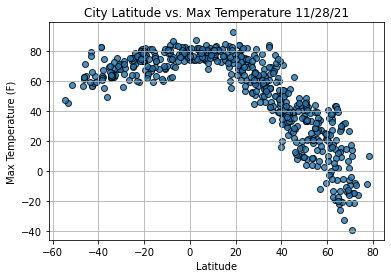

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()



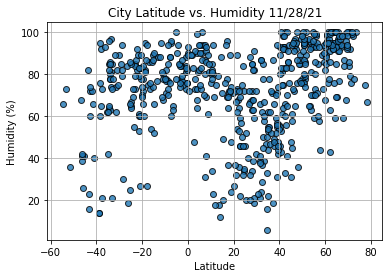

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

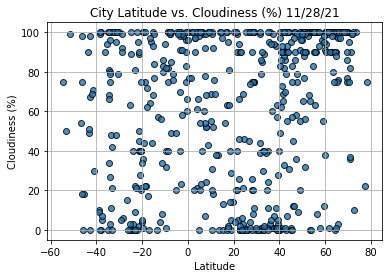

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

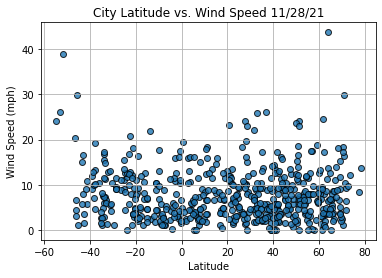

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [34]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [35]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Bethel,US,2021-11-28 22:06:14,41.3712,-73.4140,37.98,75,90,0.00
5,Kapaa,US,2021-11-28 22:01:48,22.0752,-159.3190,77.45,68,5,13.47
7,Kintampo,GH,2021-11-28 22:04:46,8.0563,-1.7306,81.41,41,24,4.52
9,Barrow,US,2021-11-28 22:01:21,71.2906,-156.7887,-14.78,76,90,10.36
13,Hilo,US,2021-11-28 22:02:51,19.7297,-155.0900,77.76,71,14,13.11


In [37]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


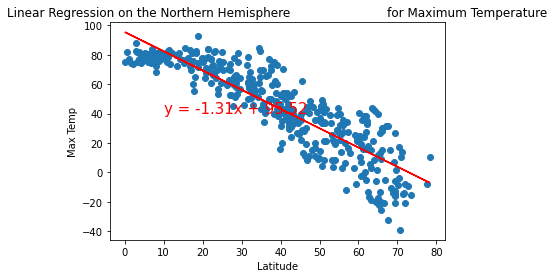

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

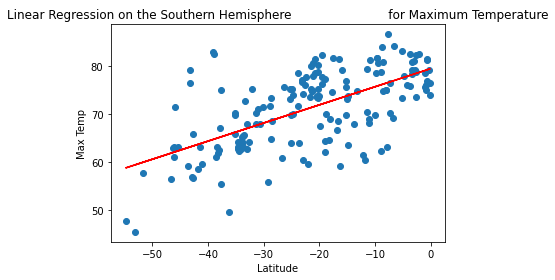

<function __main__.plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)>

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


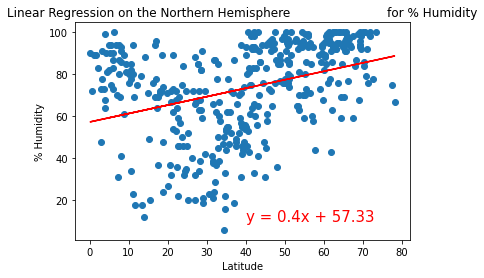

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

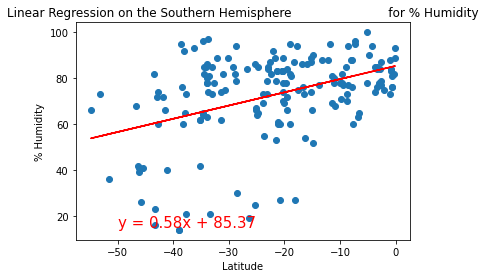

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))


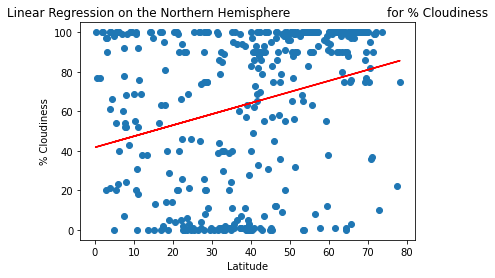

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-10,90))

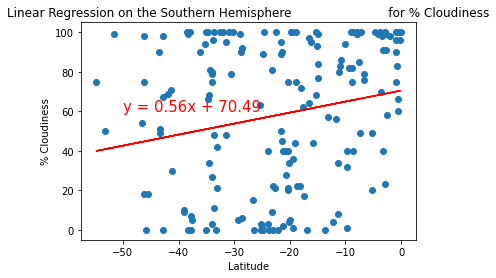

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


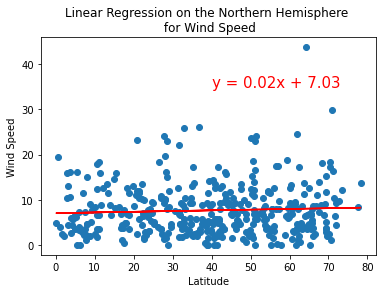

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

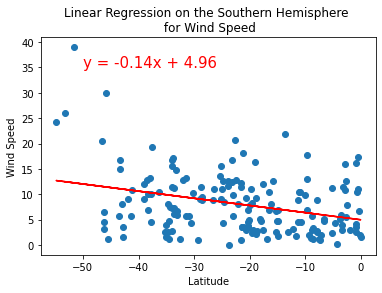

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))